### Student Information
Name: 余邦瑋

Student ID: 112033595

GitHub ID: Nick20010505

Kaggle name: Yu-Bang-Wei

Kaggle private scoreboard snapshot:
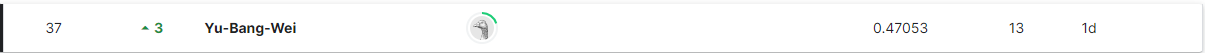

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# First Part：

In [1]:
### Begin Assignment Here
'''
Here is the exercise of DM2023-Lab2-Master
'''
# Exercise 1
print("-" * 15, "Exercise 1", "-" * 15)
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

### training data
anger_train = pd.read_csv("C:/NTHU/data mining/DM2023-Lab2-Master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("C:/NTHU/data mining/DM2023-Lab2-Master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("C:/NTHU/data mining/DM2023-Lab2-Master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("C:/NTHU/data mining/DM2023-Lab2-Master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("C:/NTHU/data mining/DM2023-Lab2-Master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("C:/NTHU/data mining/DM2023-Lab2-Master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("C:/NTHU/data mining/DM2023-Lab2-Master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("C:/NTHU/data mining/DM2023-Lab2-Master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

train_count_vect = CountVectorizer()
test_count_vect = CountVectorizer()
train_counts = train_count_vect.fit_transform(train_df.text)
test_counts = test_count_vect.fit_transform(test_df.text)

train_term_frequencies = np.asarray(train_counts.sum(axis=0))[0]
test_term_frequencies = np.asarray(test_counts.sum(axis=0))[0]

#找 train data 中前30高的 word frequency
top_indices = np.argsort(-train_term_frequencies)[:30]  # 從高到低取前30個索引
selected_texts = [train_count_vect.get_feature_names_out()[i] for i in top_indices]  # 根據索引取得詞彙
selected_counts = train_term_frequencies[top_indices]  # 根據索引取得對應的次數

train_term_frequencies_dict = {'Texts': selected_texts, 'counts': selected_counts}
df = pd.DataFrame(train_term_frequencies_dict)

fig = px.bar(df, x='Texts', y='counts', title='train data')
fig.update_xaxes(tickangle=90)
fig.show()

#找 test data 中前30高的 word frequency
top_indices = np.argsort(-test_term_frequencies)[:30]  # 從高到低取前30個索引
selected_texts = [test_count_vect.get_feature_names_out()[i] for i in top_indices]  # 根據索引取得詞彙
selected_counts = test_term_frequencies[top_indices]  # 根據索引取得對應的次數

test_term_frequencies_dict = {'Texts': selected_texts, 'counts': selected_counts}
df = pd.DataFrame(test_term_frequencies_dict)

fig = px.bar(df, x='Texts', y='counts', title='test data')
fig.update_xaxes(tickangle=90)
fig.show()

print("-" * 42)

--------------- Exercise 1 ---------------


------------------------------------------


In [2]:
# Exercise 2
print("-" * 15, "Exercise 2", "-" * 15)
#讀取資料
import pandas as pd
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_features_1000 = TfidfVectorizer(max_features=1000) #抓取前1000大的features
tf_idf_1000 = tfidf_features_1000.fit(train_df['text'])
print(tf_idf_1000.get_feature_names_out()[100:110]) #顯示出100-109index的feature names

print("-" * 42)

--------------- Exercise 2 ---------------
['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']
------------------------------------------


In [3]:
# Exercise 3
print("-" * 15, "Exercise 3", "-" * 15)

print("混淆矩陣展示了模型對於測試數據的預測結果和真實標籤之間的關係")
print("對角線上的數值（如55, 76, 54, 44）表示模型正確預測的數量")
print("非對角線上的數值表示模型預測錯誤的數量，包括False Positives和False Negatives")

print("-" * 42)

--------------- Exercise 3 ---------------
混淆矩陣展示了模型對於測試數據的預測結果和真實標籤之間的關係
對角線上的數值（如55, 76, 54, 44）表示模型正確預測的數量
非對角線上的數值表示模型預測錯誤的數量，包括False Positives和False Negatives
------------------------------------------


--------------- Exercise 4 ---------------


c:\Users\nick2\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



multi_nb train accuracy: 0.79
multi_nb test accuracy: 0.7


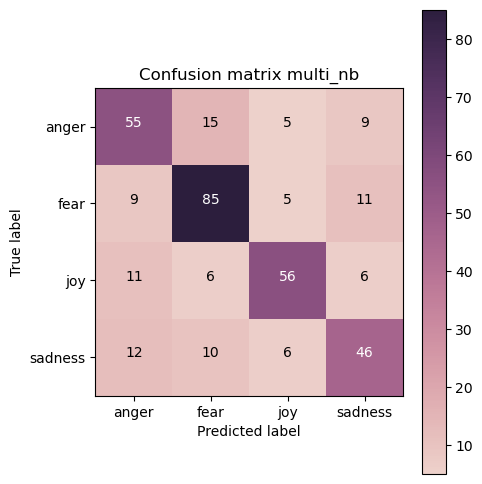

------------------------------------------


In [4]:
# Exercise 4
print("-" * 15, "Exercise 4", "-" * 15)

# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[0]),
           yticks=np.arange(cm.shape[1]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data
BOW_500.fit(train_df['text'])

#處理好訓練跟測試資料
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

#呼叫模型
model_mnb = MultinomialNB()
model_mnb.fit(X_train,y_train) #訓練
#預測
y_train_pred = model_mnb.predict(X_train)
y_test_pred = model_mnb.predict(X_test)
#計算精確度
acc_train_score = accuracy_score(y_train_pred, y_train)
acc_test_score = accuracy_score(y_test_pred, y_test)

print('multi_nb train accuracy:', format(round(acc_train_score, 2)))
print('multi_nb test accuracy:', format(round(acc_test_score, 2)))
#繪製 confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(confusion_matrix(y_true=y_test, y_pred=y_test_pred), classes=my_tags, title='Confusion matrix multi_nb')

print("-" * 42)

In [5]:
# Exercise 5
print("-" * 15, "Exercise 5", "-" * 15)

print("在training accuracy決策樹可以達到非常好的0.99，而我們的multi_nb確只有0.79，看起來是決策樹占了優勢")
print("而在testing accuracy決策樹掉到非常糟糕的0.68，而我們的multi_nb還是維持差不多的0.7，可以發現決策樹產生了overfiiting的問題")
print("但我認為如果對範例4的程式碼進行優化，multi_nb可以到達更好的準確度")

print("-" * 42)

--------------- Exercise 5 ---------------
在training accuracy決策樹可以達到非常好的0.99，而我們的multi_nb確只有0.79，看起來是決策樹占了優勢
而在testing accuracy決策樹掉到非常糟糕的0.68，而我們的multi_nb還是維持差不多的0.7，可以發現決策樹產生了overfiiting的問題
但我認為如果對範例4的程式碼進行優化，multi_nb可以到達更好的準確度
------------------------------------------


--------------- Exercise 6 ---------------





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0  

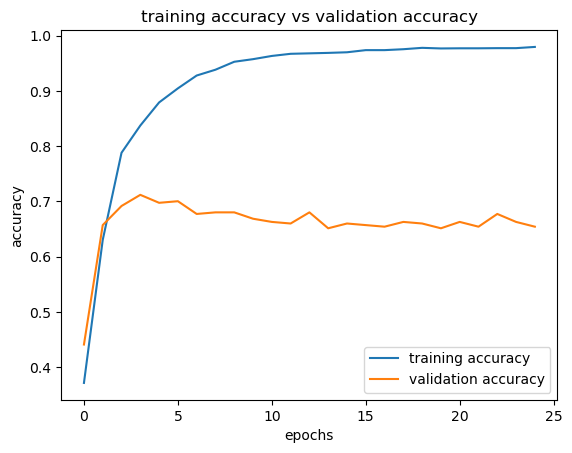

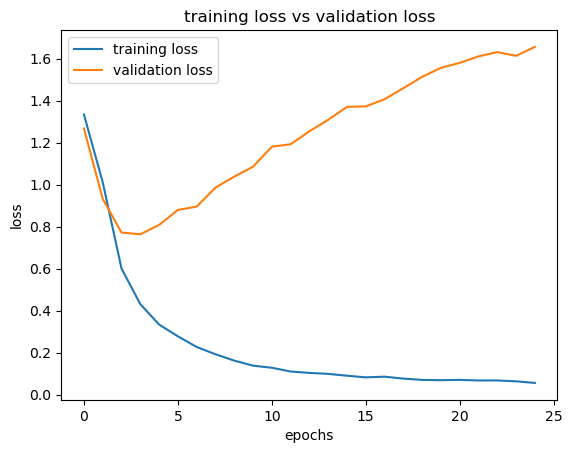

------------------------------------------


In [6]:
# Exercise 6
print("-" * 15, "Exercise 6", "-" * 15)
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger
import keras

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

csv_logger = CSVLogger('logs/training_log.csv',)

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')
#預測結果
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
#畫出training跟validation精確度
plt.figure()
plt.plot(training_log["accuracy"], label = "training accuracy") 
plt.plot(training_log["val_accuracy"], label = "validation accuracy") 
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("training accuracy vs validation accuracy")
#畫出training跟validation 的 loss curve
plt.figure()
plt.plot(training_log["loss"], label = "training loss") 
plt.plot(training_log["val_loss"], label = "validation loss") 
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("training loss vs validation loss")

plt.show()
print("-" * 42)

In [7]:
# Exercise 7
print("-" * 15, "Exercise 7", "-" * 15)
from gensim.models import KeyedVectors
import nltk
# nltk.download('stopwords')
## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

sentence = "The data mining is a very useful lesson"
VALUE_COUNT = 100

stop_words = set(nltk.corpus.stopwords.words('english'))
sent_arr = [w for w in sentence.split() if not w.lower() in stop_words]
total_length = sum(map(len, sent_arr))

df = pd.DataFrame(None, columns =['Name', 'Score'])

for item in sent_arr:
    temp_df = pd.DataFrame(w2v_google_model.most_similar(item, topn=VALUE_COUNT), columns =['Name', 'Score'])
    # 計算句子中每個單字的重要性
    temp_df["Score"] *= len(item)/total_length
    # 將處理過的單字分開
    same_keys = temp_df[temp_df["Name"].isin(df["Name"])]
    diff_keys = temp_df[-temp_df["Name"].isin(df["Name"])].set_index('Name', drop=False)

    # 對重新出現的項目的相似度求和
    for idx,val in same_keys.iterrows():
        df.at[val["Name"],"Score"] += val["Score"]

    df = pd.concat([df, diff_keys])

print(df.sort_values(by=['Score'], ascending=False).head(10))
print("-" * 42)

--------------- Exercise 7 ---------------
load ok
                          Name     Score
lessons                lessons  0.224608
helpful                helpful  0.212334
Mining                  Mining  0.202845
mines                    mines  0.198939
coal_mining        coal_mining  0.197173
mine                      mine  0.189087
miner                    miner  0.182236
uranium_mining  uranium_mining  0.179325
miners                  miners  0.178289
valuable              valuable  0.176663
------------------------------------------


--------------- Exercise 8 ---------------


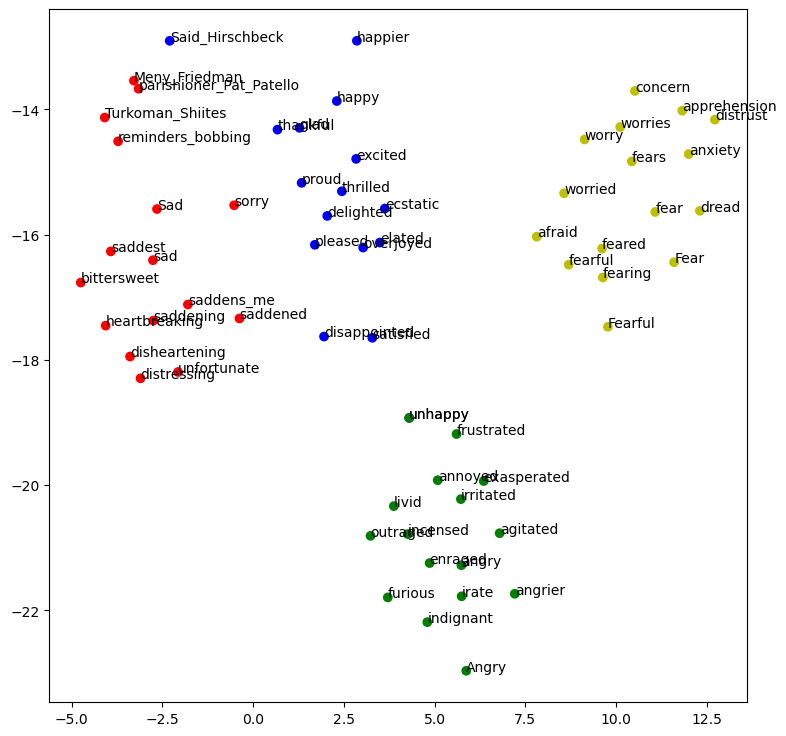

------------------------------------------


In [8]:
# Exercise 8
print("-" * 15, "Exercise 8", "-" * 15)

from sklearn.manifold import TSNE
#定義我們的四個詞語
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
mining_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + data_words + mining_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

# 準備訓練詞向量
size = 200
target_size = len(target_words)
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=35)

# training
X_tsne = tsne.fit_transform(X_train)

#繪製 t-SNE 散點圖
plt.figure(figsize=(9, 9))
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

print("-" * 42)

# Second Part：

In [1]:
print("排名截圖已放在上方!")

排名截圖已放在上方!


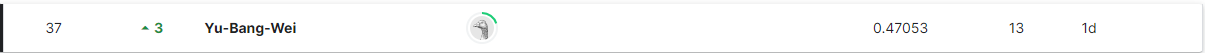

# Third Part：

##### 這部分為kaggle競賽報告，因為檔案篇幅較大，所以我移至同一資料夾內的 "kaggle.ipynb" 檔案內做講解

#### 還麻煩助教查看，感謝